In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [108]:
# Load the dataset from the specified Excel sheet
file_path = 'PresentationData.xlsx'
df = pd.read_excel(file_path, sheet_name='Data (Use This)')

# Remove rows with any blank cells
df_cleaned = df.dropna()
df_cleaned

,Gender_P1,Age_P1,Age_P2,Age Difference,Race_P1,Race_P2,SameRaceFlag,ImportanceSameRace_P1,ImportanceSameReligion_P1,FieldofStudy_P1,...,theaterP1_P1,moviesP1_P1,concertsP1_P1,musicP1_P1,shoppingP1_P1,yogaP1_P1,IntresetinCorrelation,P1Decision,P2Decision,IsMatch
0,female,21.0,27.0,6,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,Law,...,1.0,10.0,10.0,9.0,8.0,1.0,0.14,1,0,0
1,female,21.0,22.0,1,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,Law,...,1.0,10.0,10.0,9.0,8.0,1.0,0.54,1,0,0
2,female,21.0,22.0,1,Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,2.0,4.0,Law,...,1.0,10.0,10.0,9.0,8.0,1.0,0.16,1,1,1
3,female,21.0,23.0,2,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,Law,...,1.0,10.0,10.0,9.0,8.0,1.0,0.61,1,1,1
4,female,21.0,24.0,3,Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,2.0,4.0,Law,...,1.0,10.0,10.0,9.0,8.0,1.0,0.21,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8367,male,25.0,28.0,3,European/Caucasian-American,Other,0,1.0,1.0,Climate Dynamics,...,7.0,9.0,10.0,10.0,7.0,3.0,0.37,0,0,0
8368,male,25.0,26.0,1,European/Caucasian-American,European/Caucasian-American,1,1.0,1.0,Climate Dynamics,...,7.0,9.0,10.0,10.0,7.0,3.0,0.27,0,1,0
8369,male,25.0,22.0,3,European/Caucasian-American,European/Caucasian-American,1,1.0,1.0,Climate Dynamics,...,7.0,9.0,10.0,10.0,7.0,3.0,0.45,0,1,0
8370,male,25.0,27.0,2,European/Caucasian-American,Asian/Pacific Islander/Asian-American,0,1.0,1.0,Climate Dynamics,...,7.0,9.0,10.0,10.0,7.0,3.0,0.35,0,1,0


Correlation between Person 1's Age and Matching Likelihood: -0.035199634777520784
Correlation between Person 2's Age and Matching Likelihood: -0.027548723787874783
Correlation between Age Difference and Matching Likelihood: -0.06268198443899624
Correlation between Person 1's Age and P1 Decision: 0.0033243749954968587
Correlation between Person 2's Age and P2 Decision: 0.02188336544357038


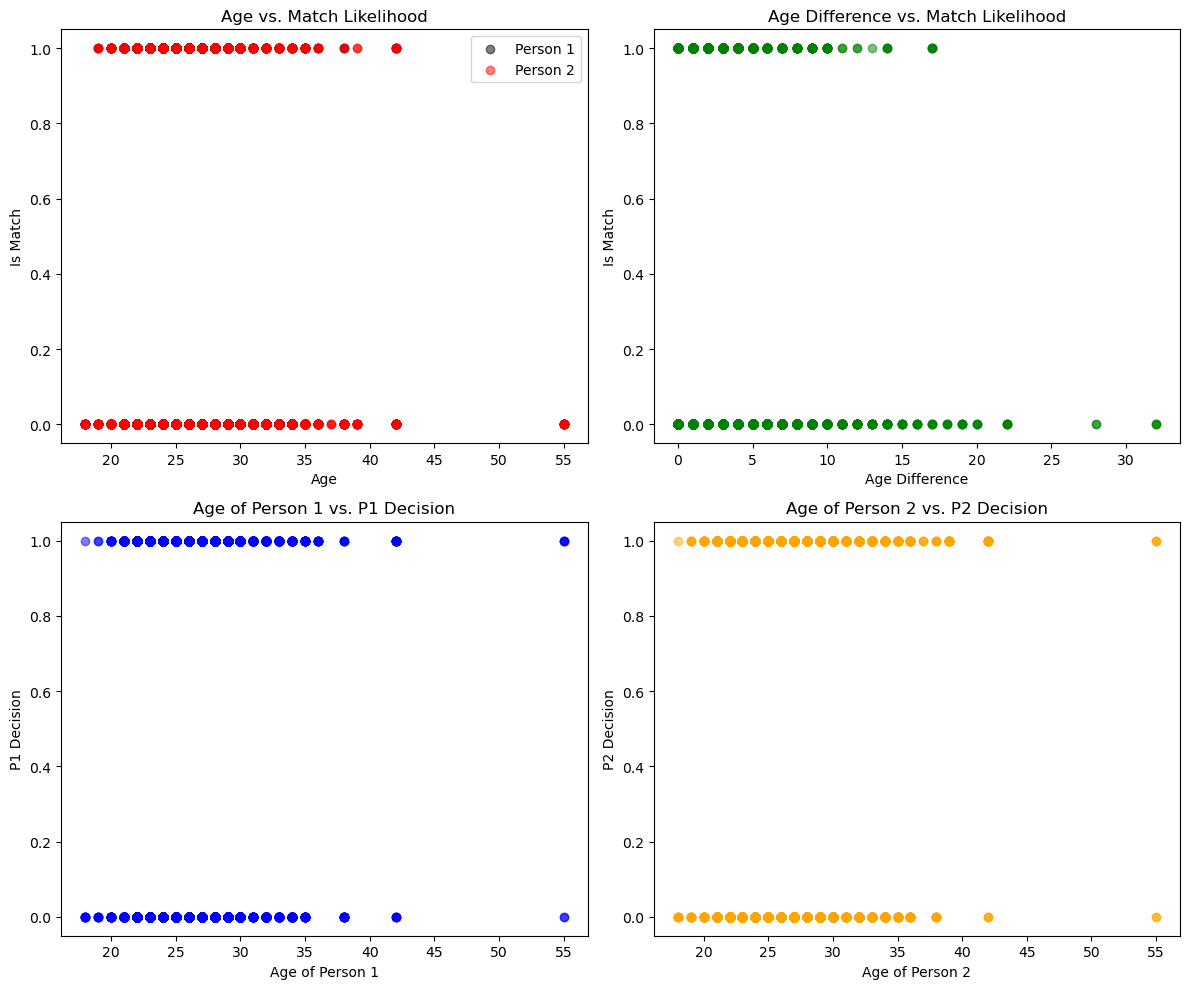

In [99]:
#Do we see that people are more likely to get matched the older they are? 
#What about age difference - do we see that maybe the higher the age gap the less likely two people are to be matched?


# Check correlation of age with matching likelihood
age_match_corr_p1 = df_cleaned['Age_P1'].corr(df_cleaned['IsMatch'])
age_match_corr_p2 = df_cleaned['Age_P2'].corr(df_cleaned['IsMatch'])
print(f"Correlation between Person 1's Age and Matching Likelihood: {age_match_corr_p1}")
print(f"Correlation between Person 2's Age and Matching Likelihood: {age_match_corr_p2}")

# Analyze impact of age difference on matching likelihood
age_diff_corr = df_cleaned['Age Difference'].corr(df_cleaned['IsMatch'])
print(f"Correlation between Age Difference and Matching Likelihood: {age_diff_corr}")

# Correlation of age with decisions
age_decision_corr_p1 = df_cleaned['Age_P1'].corr(df_cleaned['P1Decision'])
age_decision_corr_p2 = df_cleaned['Age_P2'].corr(df_cleaned['P2Decision'])
print(f"Correlation between Person 1's Age and P1 Decision: {age_decision_corr_p1}")
print(f"Correlation between Person 2's Age and P2 Decision: {age_decision_corr_p2}")

# Visualize the results for better understanding
fig, ax = plt.subplots(2, 2, figsize=(12, 10))  # Adjusting the layout to fit new plots

# Plot for age vs match
ax[0, 0].scatter(df_cleaned['Age_P1'], df_cleaned['IsMatch'], alpha=0.5, label='Person 1', color='black')
ax[0, 0].scatter(df_cleaned['Age_P2'], df_cleaned['IsMatch'], alpha=0.5, label='Person 2', color='red')
ax[0, 0].set_xlabel('Age')
ax[0, 0].set_ylabel('Is Match')
ax[0, 0].set_title('Age vs. Match Likelihood')
ax[0, 0].legend()

# Plot for age difference vs match
ax[0, 1].scatter(df_cleaned['Age Difference'], df_cleaned['IsMatch'], alpha=0.5, color='green')
ax[0, 1].set_xlabel('Age Difference')
ax[0, 1].set_ylabel('Is Match')
ax[0, 1].set_title('Age Difference vs. Match Likelihood')

# Plot for age vs P1Decision
ax[1, 0].scatter(df_cleaned['Age_P1'], df_cleaned['P1Decision'], alpha=0.5, color='blue')
ax[1, 0].set_xlabel('Age of Person 1')
ax[1, 0].set_ylabel('P1 Decision')
ax[1, 0].set_title('Age of Person 1 vs. P1 Decision')

# Plot for age vs P2Decision
ax[1, 1].scatter(df_cleaned['Age_P2'], df_cleaned['P2Decision'], alpha=0.5, color='orange')
ax[1, 1].set_xlabel('Age of Person 2')
ax[1, 1].set_ylabel('P2 Decision')
ax[1, 1].set_title('Age of Person 2 vs. P2 Decision')

plt.tight_layout()
plt.show()


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


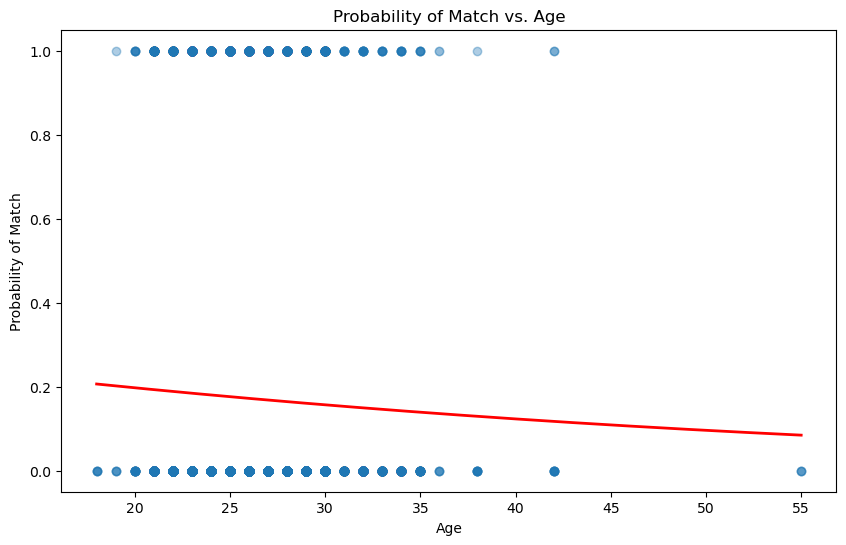

In [49]:
# Assuming df is your DataFrame and 'IsMatch' is encoded as 0 or 1
X = df_cleaned[['Age_P1']]  # you can change this to 'Age_P2' or 'Age Difference'
y = df_cleaned['IsMatch']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit logistic regression
model = LogisticRegression()
model.fit(X_scaled, y)

# Generate predictions for a range of ages
X_test = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict_proba(X_test_scaled)[:, 1]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.2)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Probability of Match')
plt.title('Probability of Match vs. Age')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_21036\2347955309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['AgeBin_P1'] = pd.cut(df_cleaned['Age_P1'], bins, right=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_21036\2347955309.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['AgeBin_P2'] = pd.cut(df_cleaned['Age_P2'], bins, right=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_21036\2347955309.py:8: FutureWarning: The default of observed=False is deprecated and will be 

Match percentages by age bin for Person 1:
AgeBin_P1
[18, 23)    19.106700
[23, 28)    17.772512
[28, 33)    15.752309
[33, 38)    13.261649
[38, 43)    15.789474
[43, 48)          NaN
[48, 53)          NaN
[53, 58)     0.000000
Name: IsMatch, dtype: float64

Match percentages by age bin for Person 2:
AgeBin_P2
[18, 23)    17.715618
[23, 28)    17.741935
[28, 33)    16.184650
[33, 38)    14.956012
[38, 43)    17.391304
[43, 48)          NaN
[48, 53)          NaN
[53, 58)     0.000000
Name: IsMatch, dtype: float64


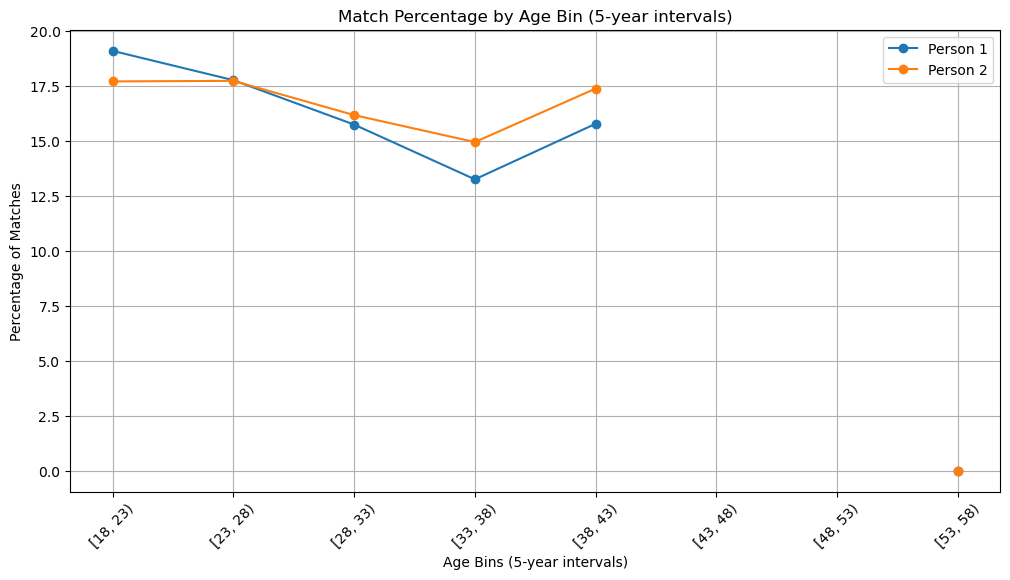

In [101]:
# Assuming 'IsMatch' is already in a boolean format (True/False) or binary (0/1) format that does not require conversion
# Bin ages for both Person 1 and Person 2 into 5-year bins
bins = range(int(df_cleaned['Age_P1'].min()), int(df_cleaned['Age_P1'].max()) + 5, 5)
df_cleaned['AgeBin_P1'] = pd.cut(df_cleaned['Age_P1'], bins, right=False)
df_cleaned['AgeBin_P2'] = pd.cut(df_cleaned['Age_P2'], bins, right=False)

# Calculate match percentages by age bin for Person 1
match_percentages_p1 = df_cleaned.groupby('AgeBin_P1')['IsMatch'].mean() * 100

# Calculate match percentages by age bin for Person 2
match_percentages_p2 = df_cleaned.groupby('AgeBin_P2')['IsMatch'].mean() * 100

# Print the results
print("Match percentages by age bin for Person 1:")
print(match_percentages_p1)
print("\nMatch percentages by age bin for Person 2:")
print(match_percentages_p2)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(match_percentages_p1.index.astype(str), match_percentages_p1.values, label='Person 1', marker='o')
plt.plot(match_percentages_p2.index.astype(str), match_percentages_p2.values, label='Person 2', marker='o')
plt.xlabel('Age Bins (5-year intervals)')
plt.ylabel('Percentage of Matches')
plt.title('Match Percentage by Age Bin (5-year intervals)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_21036\4281410548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['AgeBin'] = pd.cut(df_cleaned['Age_P1'], bins, right=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_21036\4281410548.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  activity_preferences = df_cleaned.groupby('AgeBin')[activity_columns].mean()


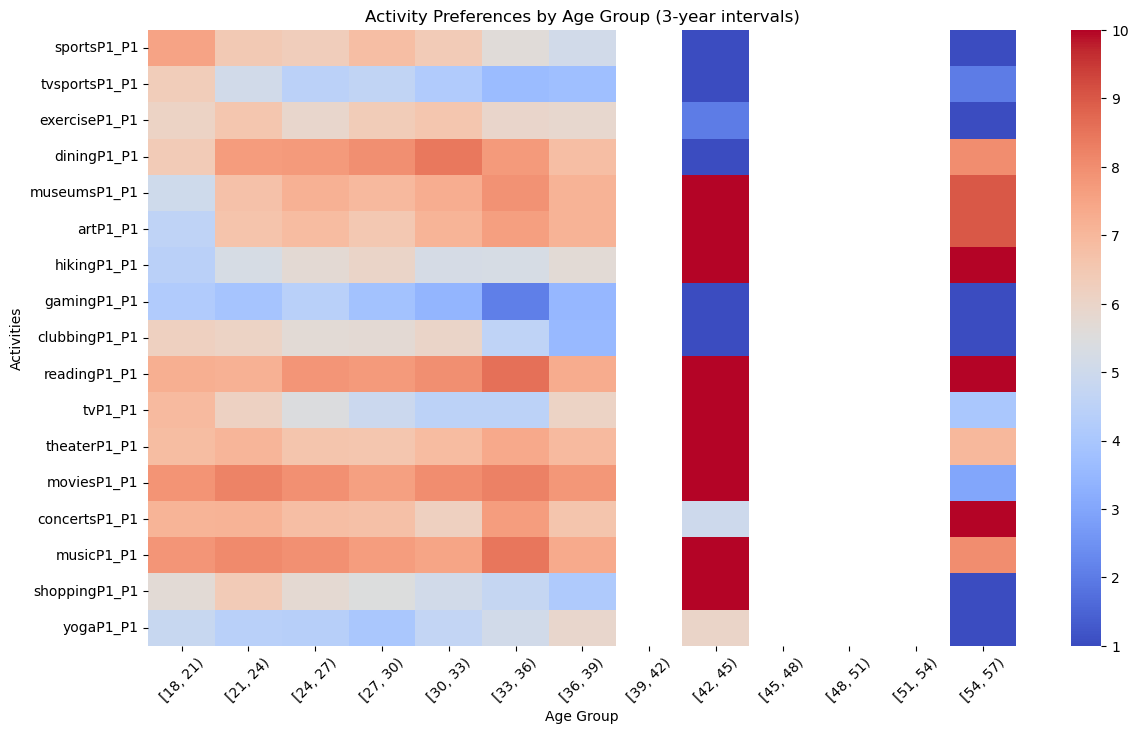

Correlation between Interest Similarity and Matching Likelihood: 0.029


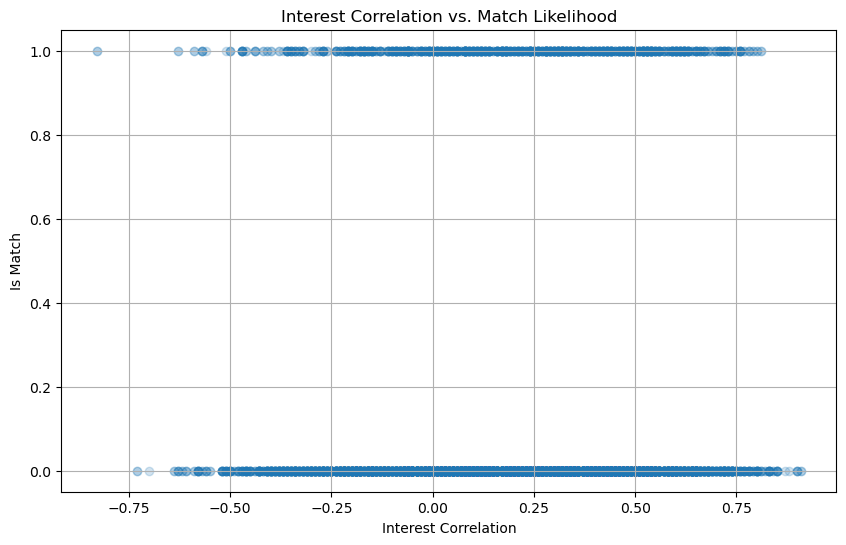

In [112]:

# Bin ages into 3-year intervals
bins = range(int(df_cleaned['Age_P1'].min()), int(df_cleaned['Age_P1'].max()) + 3, 3)
df_cleaned['AgeBin'] = pd.cut(df_cleaned['Age_P1'], bins, right=False)

# Selecting activity columns for Person 1
activity_columns = [
    'sportsP1_P1', 'tvsportsP1_P1', 'exerciseP1_P1', 'diningP1_P1', 'museumsP1_P1', 
    'artP1_P1', 'hikingP1_P1', 'gamingP1_P1', 'clubbingP1_P1', 'readingP1_P1',
    'tvP1_P1', 'theaterP1_P1', 'moviesP1_P1', 'concertsP1_P1', 'musicP1_P1',
    'shoppingP1_P1', 'yogaP1_P1'
]

# Calculate the mean of each activity by age bin
activity_preferences = df_cleaned.groupby('AgeBin')[activity_columns].mean()

# Plotting activity preferences by age group
fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(activity_preferences.T, cmap='coolwarm', ax=ax)
ax.set_title('Activity Preferences by Age Group (3-year intervals)')
ax.set_xlabel('Age Group')
ax.set_ylabel('Activities')
plt.xticks(rotation=45)
plt.show()

# Analyzing the correlation between interest correlation and match outcomes
interest_match_corr = df_cleaned['IntresetinCorrelation'].corr(df_cleaned['IsMatch'])
print(f"Correlation between Interest Similarity and Matching Likelihood: {interest_match_corr:.3f}")

# Optional: Plotting the relationship between interest correlation and IsMatch
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['IntresetinCorrelation'], df_cleaned['IsMatch'], alpha=0.2)
plt.xlabel('Interest Correlation')
plt.ylabel('Is Match')
plt.title('Interest Correlation vs. Match Likelihood')
plt.grid(True)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_21036\317111508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['AgeBin_P1'] = pd.cut(df_cleaned['Age_P1'], bins, right=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_21036\317111508.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  partner_preferences = df_cleaned.groupby('AgeBin_P1')[partner_columns].mean()
C:\Users\Admin\AppData\Local\Temp\ipykernel_21036\317111508.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pa

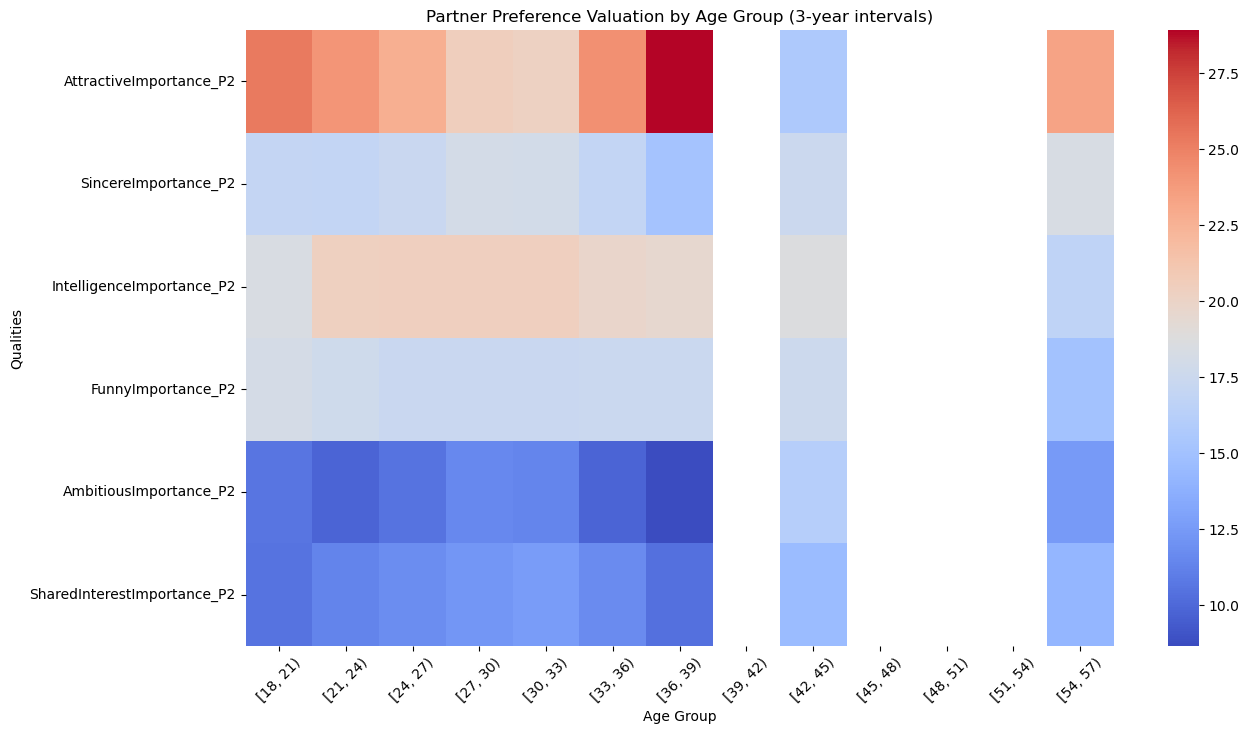

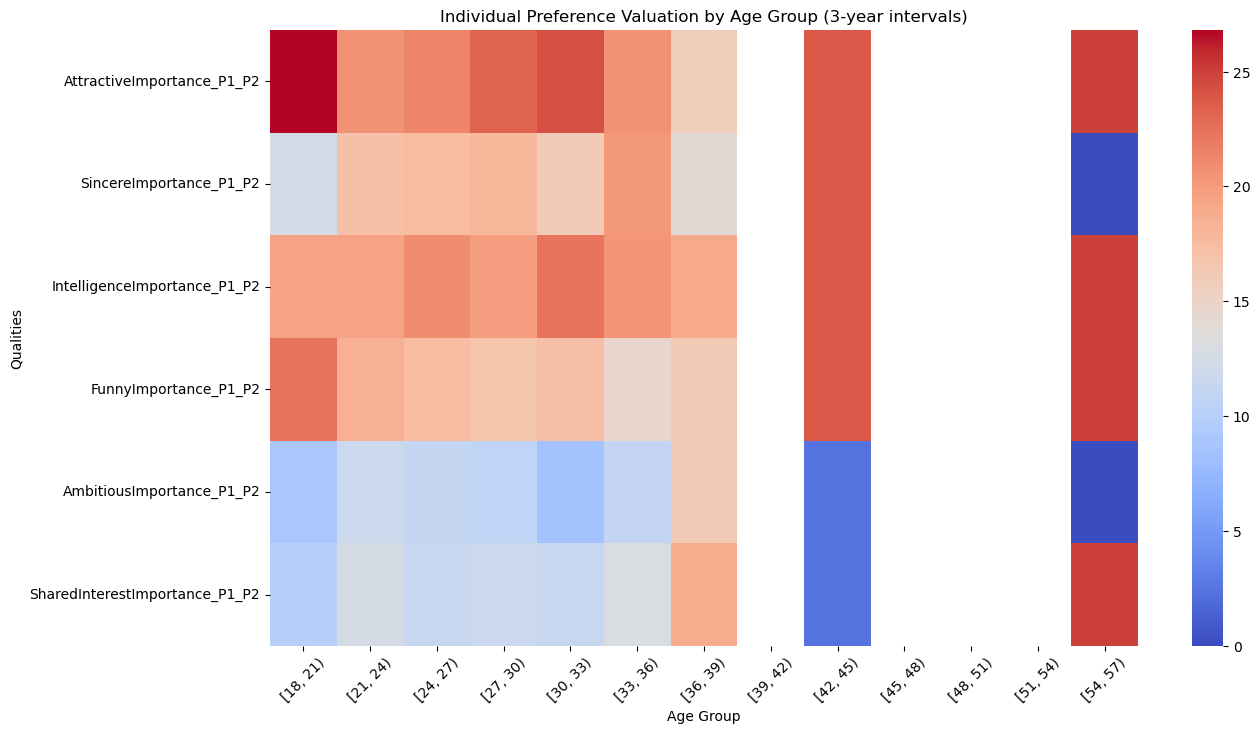

In [73]:
# Define age bins for every 3 years
bins = range(int(df_cleaned['Age_P1'].min()), int(df_cleaned['Age_P1'].max()) + 3, 3)
df_cleaned['AgeBin_P1'] = pd.cut(df_cleaned['Age_P1'], bins, right=False)

# Repeat for AgeBin_P2 if necessary
# bins = range(int(df_cleaned['Age_P2'].min()), int(df_cleaned['Age_P2'].max()) + 3, 3)
# df_cleaned['AgeBin_P2'] = pd.cut(df_cleaned['Age_P2'], bins, right=False)

# Define the columns for partner's and individual's valuation of qualities
partner_columns = [
    'AttractiveImportance_P2', 'SincereImportance_P2', 'IntelligenceImportance_P2', 
    'FunnyImportance_P2', 'AmbitiousImportance_P2', 'SharedInterestImportance_P2'
]

individual_columns = [
    'AttractiveImportance_P1_P2', 'SincereImportance_P1_P2', 'IntelligenceImportance_P1_P2', 
    'FunnyImportance_P1_P2', 'AmbitiousImportance_P1_P2', 'SharedInterestImportance_P1_P2'
]

# Calculate the mean of each quality by age bin for Partner's valuation
partner_preferences = df_cleaned.groupby('AgeBin_P1')[partner_columns].mean()

# Calculate the mean of each quality by age bin for Individual's valuation
individual_preferences = df_cleaned.groupby('AgeBin_P1')[individual_columns].mean()

# Plotting partner preferences by age group
fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(partner_preferences.T, cmap='coolwarm', ax=ax)
ax.set_title('Partner Preference Valuation by Age Group (3-year intervals)')
ax.set_xlabel('Age Group')
ax.set_ylabel('Qualities')
plt.xticks(rotation=45)
plt.show()

# Plotting individual preferences by age group
fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(individual_preferences.T, cmap='coolwarm', ax=ax)
ax.set_title('Individual Preference Valuation by Age Group (3-year intervals)')
ax.set_xlabel('Age Group')
ax.set_ylabel('Qualities')
plt.xticks(rotation=45)
plt.show()

Correlation between average difference in quality valuations and match outcomes: 0.003


C:\Users\Admin\AppData\Local\Temp\ipykernel_21036\198979816.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[f'Diff_{individual.split("_")[0]}'] = abs(df_cleaned[individual] - df_cleaned[partner])
C:\Users\Admin\AppData\Local\Temp\ipykernel_21036\198979816.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Average_Difference'] = df_cleaned[[f'Diff_{col.split("_")[0]}' for col in individual_columns]].mean(axis=1)


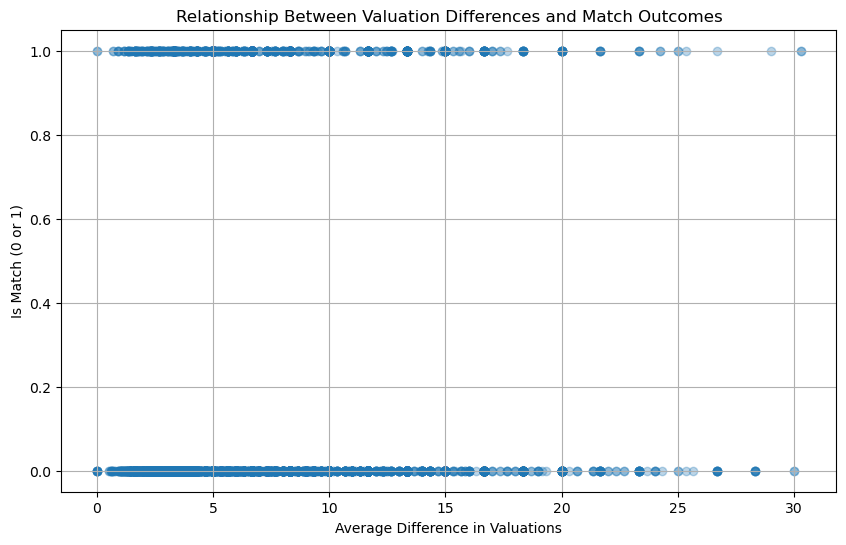

In [87]:

# Define the columns for individual and partner's valuation of qualities
individual_columns = [
    'AttractiveImportance_P1_P2', 'SincereImportance_P1_P2', 'IntelligenceImportance_P1_P2', 
    'FunnyImportance_P1_P2', 'AmbitiousImportance_P1_P2', 'SharedInterestImportance_P1_P2'
]
partner_columns = [
    'AttractiveImportance_P2', 'SincereImportance_P2', 'IntelligenceImportance_P2', 
    'FunnyImportance_P2', 'AmbitiousImportance_P2', 'SharedInterestImportance_P2'
]

# Calculate the absolute differences in importance ratings between partners
for individual, partner in zip(individual_columns, partner_columns):
    df_cleaned[f'Diff_{individual.split("_")[0]}'] = abs(df_cleaned[individual] - df_cleaned[partner])

# Average differences to get a single similarity score for each pair
df_cleaned['Average_Difference'] = df_cleaned[[f'Diff_{col.split("_")[0]}' for col in individual_columns]].mean(axis=1)

# Correlate the average difference with match outcomes
correlation_with_match = df_cleaned['Average_Difference'].corr(df_cleaned['IsMatch'])

# Output the correlation
print(f"Correlation between average difference in quality valuations and match outcomes: {correlation_with_match:.3f}")

# Optionally, plot this relationship
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Average_Difference'], df_cleaned['IsMatch'], alpha=0.3)
plt.xlabel('Average Difference in Valuations')
plt.ylabel('Is Match (0 or 1)')
plt.title('Relationship Between Valuation Differences and Match Outcomes')
plt.grid(True)
plt.show()


Percentage of both positive decisions that lead to a match: 100.00%
Match rate when P1 decides positively: 39.79%
Match rate when P2 decides positively: 39.58%
Correlation matrix between decisions and match outcome:
            P1Decision  P2Decision   IsMatch
P1Decision    1.000000   -0.063033  0.522640
P2Decision   -0.063033    1.000000  0.520129
IsMatch       0.522640    0.520129  1.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_21036\2474087418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['BothPositive'] = (df_cleaned['P1Decision'] == 1) & (df_cleaned['P2Decision'] == 1)


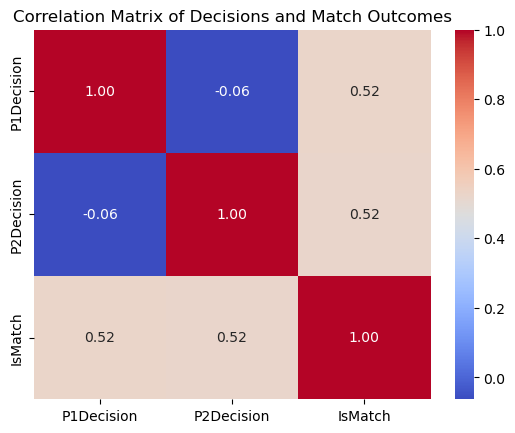

Correlation between individual valuations and match outcomes:
AttractiveImportance_P1_P2        0.003454
SincereImportance_P1_P2          -0.035823
IntelligenceImportance_P1_P2      0.012883
FunnyImportance_P1_P2             0.047332
AmbitiousImportance_P1_P2         0.011536
SharedInterestImportance_P1_P2   -0.042081
Name: IsMatch, dtype: float64


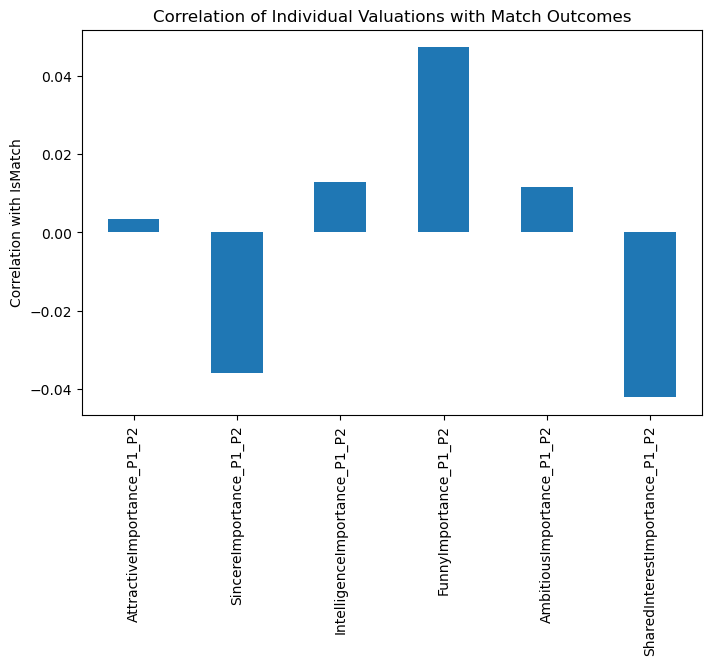

In [91]:
# Calculate the match rate where both decisions are positive
df_cleaned['BothPositive'] = (df_cleaned['P1Decision'] == 1) & (df_cleaned['P2Decision'] == 1)
match_rate = df_cleaned[df_cleaned['BothPositive']]['IsMatch'].mean() * 100
print(f"Percentage of both positive decisions that lead to a match: {match_rate:.2f}%")

# Individual decision impact on match rates
p1_decision_match_rate = df_cleaned[df_cleaned['P1Decision'] == 1]['IsMatch'].mean() * 100
p2_decision_match_rate = df_cleaned[df_cleaned['P2Decision'] == 1]['IsMatch'].mean() * 100
print(f"Match rate when P1 decides positively: {p1_decision_match_rate:.2f}%")
print(f"Match rate when P2 decides positively: {p2_decision_match_rate:.2f}%")

# Correlation of decisions with IsMatch
decision_correlation = df_cleaned[['P1Decision', 'P2Decision', 'IsMatch']].corr()
print("Correlation matrix between decisions and match outcome:")
print(decision_correlation)

# Visualizing the correlation matrix
sns.heatmap(decision_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Decisions and Match Outcomes')
plt.show()

# Correlation between quality valuations and match outcomes
# Assuming individual_columns represent the qualities valued by Person 1
correlations = df_cleaned[individual_columns + ['IsMatch']].corr()['IsMatch'].drop('IsMatch')
print("Correlation between individual valuations and match outcomes:")
print(correlations)

# Plotting correlations for visual analysis
fig, ax = plt.subplots(figsize=(8, 5))
correlations.plot(kind='bar', ax=ax)
ax.set_ylabel('Correlation with IsMatch')
ax.set_title('Correlation of Individual Valuations with Match Outcomes')
plt.show()


In [120]:
df_cleaned['FieldofStudy_P1'].list_values()

AttributeError: 'Series' object has no attribute 'list_values'

In [144]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [146]:
import pandas as pd

data = pd.read_csv("GroupPresentationData.csv")

data_cleaned = data[[
    'Age_F', 'Age_M', 'Race_M', 'Race_F', 'Attractive_M_M', 'Attractive_F_F',
    'Sincere_M_M', 'Sincere_F_F', 'Intelligence_M_M', 'Intelligence_F_F',
    'Funny_M_M', 'Funny_F_F', 'Ambition_M_M', 'Ambition_F_F',
    'AttractiveImportance_M_M', 'AttractiveImportance_F_F',
    'SincereImportance_M_M', 'SincereImportance_F_F',
    'IntelligenceImportance_M_M', 'IntelligenceImportance_F_F',
    'AmbitiousImportance_M_M', 'AmbitiousImportance_F_F',
    'SharedInterestImportance_M_M', 'SharedInterestImportance_F_F',
    'ValuesDelta', 'Similar_Values_Bucket', 'SimilarityBucket',
    'IntresetinCorrelation', 'IsMatch'
]]

data_cleaned['IsMatch'] = pd.Categorical(data['IsMatch'])
data_cleaned['Race_M'] = pd.Categorical(data['Race_M'])
data_cleaned['Race_F'] = pd.Categorical(data['Race_F'])
data_cleaned['Similar_Values_Bucket'] = pd.Categorical(data['Similar_Values_Bucket'])
data_cleaned['SimilarityBucket'] = pd.Categorical(data['SimilarityBucket'])



C:\Users\Admin\AppData\Local\Temp\ipykernel_21036\364692663.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['IsMatch'] = pd.Categorical(data['IsMatch'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_21036\364692663.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Race_M'] = pd.Categorical(data['Race_M'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_21036\364692663.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [148]:
columns_to_select = [
    'Age_M', 'Age_F', 'Race_M', 'Race_F', 
    'Attractive_M_M', 'Attractive_F_F', 
    'Sincere_M_M', 'Sincere_F_F', 
    'Intelligence_M_M', 'Intelligence_F_F', 
    'Funny_M_M', 'Funny_F_F', 
    'Ambition_M_M', 'Ambition_F_F', 
    'AttractiveImportance_M_M', 'AttractiveImportance_F_F', 
    'SincereImportance_M_M', 'SincereImportance_F_F', 
    'IntelligenceImportance_M_M', 'IntelligenceImportance_F_F', 
    'AmbitiousImportance_M_M', 'AmbitiousImportance_F_F', 
    'SharedInterestImportance_M_M', 'SharedInterestImportance_F_F', 
    'ValuesDelta', 'Similar_Values_Bucket', 
    'SimilarityBucket', 'IntresetinCorrelation', 'IsMatch'
]

# Select columns
test_cleaned = test[columns_to_select]
train_cleaned = train[columns_to_select]

# Convert categorical data
categorical_columns = ['IsMatch', 'Race_M', 'Race_F', 'Similar_Values_Bucket', 'SimilarityBucket']
for col in categorical_columns:
    train_cleaned[col] = train_cleaned[col].astype('category')
    test_cleaned[col] = test_cleaned[col].astype('category')

# Features and Target
X_train = train_cleaned.drop('IsMatch', axis=1)
y_train = train_cleaned['IsMatch']
X_test = test_cleaned.drop('IsMatch', axis=1)
y_test = test_cleaned['IsMatch']


C:\Users\Admin\AppData\Local\Temp\ipykernel_21036\555457090.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned[col] = train_cleaned[col].astype('category')
C:\Users\Admin\AppData\Local\Temp\ipykernel_21036\555457090.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_cleaned[col] = test_cleaned[col].astype('category')
C:\Users\Admin\AppData\Local\Temp\ipykernel_21036\555457090.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [156]:
tree_model = DecisionTreeClassifier(random_state=1)

print(tree_model)

DecisionTreeClassifier(random_state=1)


In [158]:
cv_scores = cross_val_score(tree_model, X_train, y_train, cv=kf)

# Train the model
tree_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.2f}')
print(f'Cross-validated scores: {cv_scores}')
print(f'Mean CV accuracy: {np.mean(cv_scores):.2f}')


ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 1009, in fit
    super()._fit(
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 252, in _fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 645, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'European/Caucasian-American'


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)